In [1]:
# モジュールのインポート
##  基本的なモジュール
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## lmfit.modelsからフィッティングしたいモデルをインポートする
from lmfit.models import VoigtModel
from lmfit.models import ConstantModel

In [2]:
# 生成データの読み取り
data1 = pd.read_csv('data1_generated.csv')

In [3]:
# columnsがintではなくobjectになっているときのために変換しておく
data1.columns = data1.columns.astype(int)

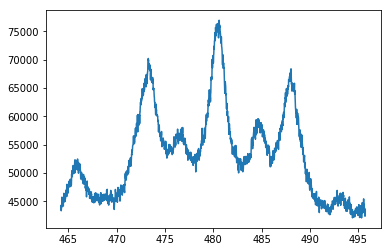

In [4]:
# プロットしたい値を取り出す。
x = np.array(data1[0])
y = np.array(data1[1])

plt.plot(x, y)

In [5]:
# 定常モデルを定義
# パラメータオブジェクトparsの生成
cons = ConstantModel(prefix='cons_')
pars = cons.guess(y, x=x)

[[Model]]
    ((((((Model(voigt, prefix='v1_') + Model(voigt, prefix='v2_')) + Model(voigt, prefix='v3_')) + Model(voigt, prefix='v4_')) + Model(voigt, prefix='v5_')) + Model(voigt, prefix='v6_')) + Model(constant, prefix='cons_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 1157
    # data points      = 2046
    # variables        = 29
    chi-square         = 1.4126e+09
    reduced chi-square = 700354.293
    Akaike info crit   = 27566.6055
    Bayesian info crit = 27729.6911
[[Variables]]
    cons_c:        43215.6152 (init = 53194.68)
    v1_sigma:      0.60458947 (init = 1)
    v1_center:     473.183651 (init = 473.3)
    v1_amplitude:  82797.9736 (init = 10000)
    v1_gamma:      0.88943863 (init = 1)
    v1_fwhm:       2.17731412 == '3.6013100*v1_sigma'
    v1_height:     22773.4224 == 'v1_amplitude*wofz((1j*v1_gamma)/(v1_sigma*sqrt(2))).real/(v1_sigma*sqrt(2*pi))'
    v2_sigma:      0.10000000 (init = 1)
    v2_center:     476.558956 (init = 476

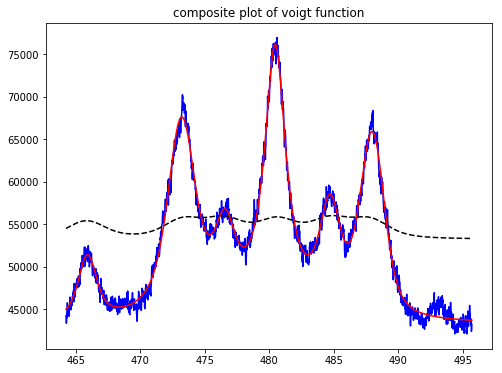

In [8]:
# 1つめのピーク
voigt1 = VoigtModel(prefix='v1_')
pars.update(voigt1.make_params())
pars['v1_center'].set(473.3, min=470, max=475)
pars['v1_sigma'].set(1, min=0.1, max=2)
pars['v1_amplitude'].set(10000, min=1)
pars['v1_gamma'].set(1, min=0.1, max=2, vary=True)

# 2つめのピーク
voigt2 = VoigtModel(prefix='v2_')
pars.update(voigt2.make_params())
pars['v2_center'].set(476.5, min=475, max=478)
pars['v2_sigma'].set(1, min=0.1, max=2)
pars['v2_amplitude'].set(10000, min=1)
pars['v2_gamma'].set(1, min=0.1, max=2, vary=True)

# 3つめのピーク
voigt3 = VoigtModel(prefix='v3_')
pars.update(voigt3.make_params())
pars['v3_center'].set(480.6, min=476, max=483)
pars['v3_sigma'].set(1, min=0.1, max=2)
pars['v3_amplitude'].set(10000, min=1)
pars['v3_gamma'].set(1, min=0.1, max=2, vary=True)

# 4つめのピーク
voigt4 = VoigtModel(prefix='v4_')
pars.update(voigt4.make_params())
pars['v4_center'].set(484.7, min=483, max=487)
pars['v4_sigma'].set(1, min=0.1, max=2)
pars['v4_amplitude'].set(10000, min=1)
pars['v4_gamma'].set(1, min=0.1, max=2, vary=True)

# 5つめのピーク
voigt5 = VoigtModel(prefix='v5_')
pars.update(voigt5.make_params())
pars['v5_center'].set(487.8, min=485, max=490)
pars['v5_sigma'].set(1, min=0.1, max=2)
pars['v5_amplitude'].set(10000, min=1)
pars['v5_gamma'].set(1, min=0.1, max=2, vary=True)

# 6つめのピーク
voigt6 = VoigtModel(prefix='v6_')
pars.update(voigt6.make_params())
pars['v6_center'].set(465.8, min=465, max=468)
pars['v6_sigma'].set(1, min=0.1, max=2)
pars['v6_amplitude'].set(10000, min=1)
pars['v6_gamma'].set(1, min=0.1, max=2, vary=True)

# 7つめのピーク
voigt7 = VoigtModel(prefix='v7_')
pars.update(voigt7.make_params())
pars['v7_center'].set(493.3, min=490, max=494)
pars['v7_sigma'].set(1, min=0.1, max=2)
pars['v7_amplitude'].set(10000, min=1)
pars['v7_gamma'].set(1, min=0.1, max=2, vary=True)

mod = voigt1 + voigt2 + voigt3 + voigt4 + voigt5 + voigt6 + cons

# 初期値
init = mod.eval(pars, x=x)

# 最適値
out = mod.fit(y, pars, x=x)
# パラメータの情報などを表示
print(out.fit_report(min_correl=0.5))
# 一つ一つのvoigt関数を表示するかどうか 
plot_components = False

#　結果のプロット
plt.figure(figsize=(8,6))
plt.plot(x, y, 'b')
plt.plot(x, init, 'k--')
plt.plot(x, out.best_fit, 'r-')
plt.title('composite plot of voigt function')

if plot_components:
    comps = out.eval_components(x=x)
    plt.plot(x, comps['v1_'], 'b--')
    plt.plot(x, comps['v2_'], 'b--')
    plt.plot(x, comps['v3_'], 'b--')
    plt.plot(x, comps['v4_'], 'b--')
    plt.plot(x, comps['v5_'], 'b--')
    plt.plot(x, comps['v6_'], 'b--')
    #plt.plot(x, comps['v7_'], 'b--')
    plt.plot(x, comps['cons_'], 'k--')

    plt.show()

plt.savefig('result.jpg')